Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

REFS: 
- Boudreau, Applied Computational Physics
- Heath, Scientific Computing
- Landau y Paez, Computational physics, problem solving with computers
- Anagnostoupulos, A practical introduction to computational physics and scientific computing
- Ward, Numerical Mathematicas and Computing


# Pseudo-random number generation
A mathematical rule allows to generate random numbers from a star point (seed) , numbers which hopefully are 
- not correlated
- have a long period
- are produced efficiently

Initial examples are the modulo generators,

\begin{equation}
x_i = ax_{i-1} + c(\textrm{mod}\, m),
\end{equation}
where the constants $a, c, m$ should be chosen with care. For instance, $m$ determines the period. A bad choice for those constant will lead to low period and large correlations. The generation of random numbers efficiently and with quality is an actual research topic, with huge implications from the field of random simulation of physical systems to the field of cryptography.


In [ ]:
class random_naive:
    def __init__(self, seed):
        self.a = 1277
        self.c = 0
        self.m = 2**17
        self.x = seed
        
    def r(self):
        self.x = (self.a*self.x + self.c)%self.m
        return self.x


In [ ]:
rnum = random_naive(1)
for ii in range(10):
    #print(rnum.r())
    print(rnum.r()/rnum.m)

0.00974273681640625
0.44147491455078125
0.7634658813476562
0.9459304809570312
0.9532241821289062
0.26728057861328125
0.31729888916015625
0.19068145751953125
0.5002212524414062
0.7825393676757812


Unfortunately, this generator produces correlations

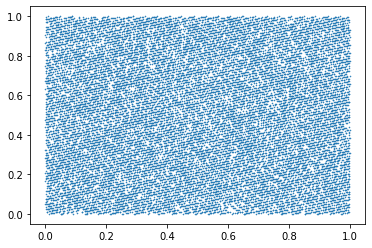

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 20000
rnum = random_naive(1)
x = np.ones(N)
for ii in range(N):
    x[ii] = rnum.r()/rnum.m
fig, ax = plt.subplots()
ax.scatter(x[0:-1], x[1:], s=0.3)#{xi,x_(i+1)}


# Numpy random number generator
Numpy has a powerfull and high quality random number generator. Some time ago they used the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) generator, which has a very large period and passes almost all tests successfully, but now they have moved to the PCG64 generator (see https://numpy.org/doc/stable/reference/random/generator.html and https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64 )

The following is an example on how to use it (besides using a random seed)

[0.02229007 0.10749114 0.64783107 0.96069815 0.77029922 0.90825261
 0.22794177 0.25380259 0.34946026 0.45687061]


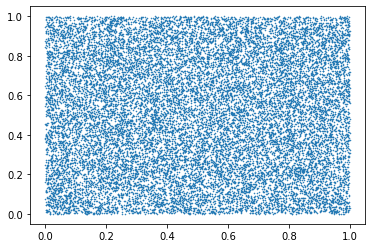

In [ ]:
import numpy as np
rng = np.random.default_rng(seed=142)
N = 20000
arr1 = rng.random((N,))
print(arr1[:10])
fig, ax = plt.subplots()
ax.scatter(arr1[0:-1], arr1[1:], s=0.3)

<mark>Exercises</mark>:
- [ ] Change the seed: do you notice any change?
- [ ] Remove the seed and print the first ten numbers after running the cell several times: are they the same?

The numpy random generator produces numbers in $[0, 1)$, which can be transformed into other distributions. Furthermore, numpy also has some distributions already present (see https://numpy.org/doc/stable/reference/random/generator.html#distributions) . If your distribution is not on those already implemented, you will a method to generate variates, like the [Rejection method](https://en.wikipedia.org/wiki/Rejection_sampling#Algorithm), [Ratio of uniforms](https://en.wikipedia.org/wiki/Ratio_of_uniforms), the [inverse transform method](https://en.wikipedia.org/wiki/Inverse_transform_sampling), or [many others](https://en.wikipedia.org/wiki/Non-uniform_random_variate_generation).

# Inverse transform method
In this case you want to invert the cumulative probability function. Let's say that you have an exponential distribution, whose density is 

\begin{equation}
f(t) = \lambda e^{-\lambda t}, t > 0
\end{equation}

whose cumulative distribution is 

\begin{equation}
F(x) = \int_0^x f(t) dt = 1 - e^{-\lambda x}.
\end{equation}

Now, the cumulative distribution is in the range $[0, 1]$. If we equate it to a uniform random number in the same interval, $z = F(x)$, then we can invert this expression and obtain $x = F^{-1}(z)$. For the exponential distribution we get

\begin{equation}
x = -\frac{\ln (1-z)}{\lambda}
\end{equation}

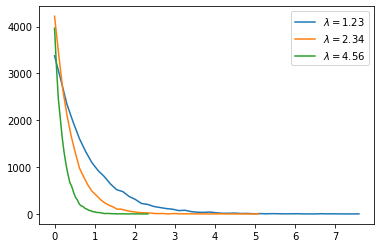

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
rng = np.random.default_rng(seed=21)
for LAMBDA in [1.23, 2.34, 4.56]: 
    N = 20000
    z = rng.random((N,))
    x = -np.log(1-z)/LAMBDA
    hist, bin_edges = np.histogram(x, bins=50)
    #ax.plot(x)
    ax.plot(bin_edges[:-1], hist, label=rf"$\lambda={LAMBDA}$")
ax.legend()

In [ ]:
hist

array([3965, 3142, 2452, 2052, 1636, 1317, 1058,  852,  673,  588,  458,
        354,  296,  209,  171,  157,  118,  102,   76,   68,   48,   44,
         32,   30,   26,   18,    8,   10,   10,    7,    6,    3,    3,
          0,    3,    1,    2,    1,    1,    0,    0,    1,    0,    1,
          0,    0,    0,    0,    0,    1])

<mark>Exercise:</mark>
- [ ] Increase/decrease the number of samples
- [ ] Increase/decrease the number of bins
- [ ] Fit the data with an exponential function of the form $ae^{-at}$. What is the $a$ value? is what you expect?

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
!pip install -y numba
from numba import jit


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


[1.19420593] [[2.46835957e-05]]


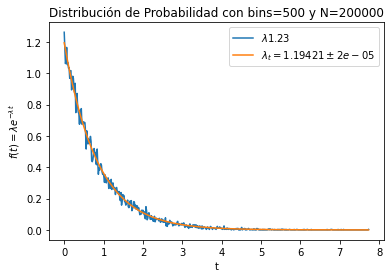

In [ ]:
def Inverse_transform_method(N,a):
    
    rng = np.random.default_rng(seed=21)
    z = rng.random((N,))
    x = -np.log(1-z)/a
    hist, bin_edges = np.histogram(x, bins=500, density = True)
    return hist, bin_edges[:-1]

def func(x, a,):
    return a * np.exp(-a * x)

N = 20000
LAMBDA = 1.23


ydata, xdata = Inverse_transform_method(N,LAMBDA)

popt, pcov = curve_fit(func, xdata, ydata)

print(popt, pcov)
plt.plot(xdata, ydata, label=f"$\lambda{LAMBDA}$")

plt.plot(xdata, func(xdata,popt), 
         label=f"$\lambda_t ={round(popt[0],5)} \pm {round(pcov[0][0],5)} $")

plt.title("Distribución de Probabilidad con bins=500 y N=200000")
plt.xlabel("t")
plt.ylabel(r"$f(t) = \lambda e^{-\lambda t}$")

plt.legend()

In [ ]:
##@jit
def Err(N):
    LAMBDA = 1.23
    rng = np.random.default_rng(seed=21)
    err = np.zeros(N)

    for i in range(N):
        print(i)
        ydata, xdata = Inverse_transform_method(i+1,LAMBDA)
        popt, pcov = curve_fit(func, xdata, ydata)
        err[i] = pcov
    return err

Ndata = np.arange(N)
Edata = Err(N)

plt.plot(Ndata, Edata,".")
plt.xscale("log")
plt.yscale("log")

hpocv, bin_edges = np.histogram(Edata, bins=N, density = True)
#plt.plot(bin_edges[:-1], hpocv,".")

plt.title("Error de ajuste vs N con bins=500 y N=20000")
plt.xlabel("N")
plt.ylabel("Error de ajuste")

plt.legend()

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

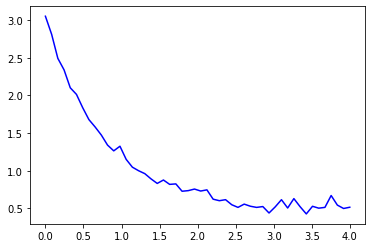

In [ ]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.05* rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

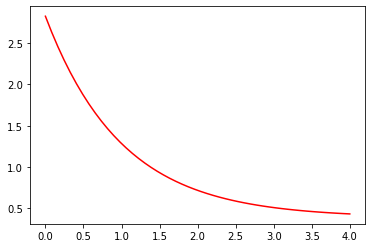

In [ ]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Generating random samples in regions
Let's assume that you want to generate random samples uniformly distributed inside the ellipse $x^2 + 4y^2 = 4$.  To do so,

1. Generate random numbers $-2 \le x \le 2$, and $-1 \le y \le 1$, reject those outside the region.
2. In other cell, do the same but, to avoid wasting number, generate $|y| \le \frac{1}{2}\sqrt{4-x^2}$.

Do you notice any difference?

(10000,)
6.312


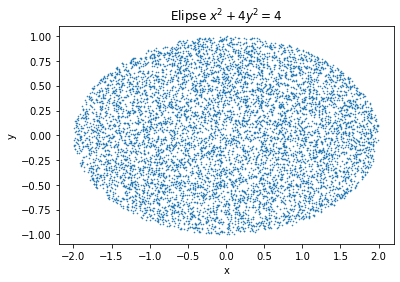

In [ ]:
"""
Nombres:
Laura Rodriguez
Roberth Ramirez
Angie Camargo
Cristian Peña
Jhon Fajardo
"""
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

rng = np.random.default_rng(seed=21)
N = 10000

#Primer método
x = rng.uniform(-2.0, 2.0, N)
y = rng.uniform(-1.0, 1.0, N)

mask = np.power(x,2) + 4*np.power(y,2) <= 4
print(mask.shape)
ydata = y[mask]
xdata = x[mask]

plt.scatter(xdata, ydata, s = 0.3)

plt.title(r"Elipse $x^2 + 4y^2 = 4$")
plt.xlabel("x")
plt.ylabel(r"y")

print(8*(x[mask].shape[0]/N))

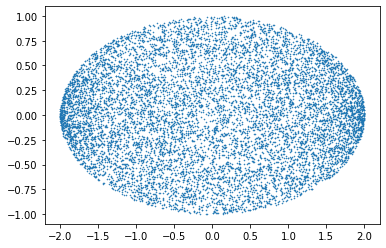

In [ ]:
#Segundo método
x = rng.uniform(-2, 2, N)
y = np.zeros_like(x)
for ii in range(N):
    limit = 0.5*np.sqrt(4 - x[ii]**2)
    y[ii] = rng.uniform(-limit, limit, 1)
plt.scatter(x, y, s=0.3)

NotImplementedError: ignored

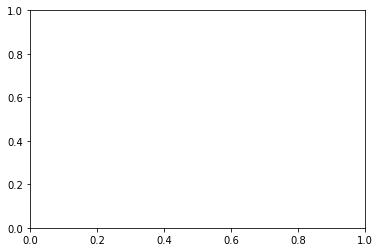

In [ ]:
%matplotlib inline
# Solution to point 2
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

rng = np.random.default_rng(seed=21)
N = 10000
# YOUR CODE HERE
raise NotImplementedError()

<mark>Exercises</mark>
- [ ] Can you estimate the are from the previous computation (method 1)
- [ ] Generate a random sample in the triangular region delimited by the x and y axis and the straight line $y = 1-x$.
- [ ] Generate a random uniform sample in the diamond figure with vertexes at $(1, 0), (0, 1), (-1, 0), (0, -1)$.
- [ ] Generate a random uniform sample in a sphere, $x^2 + y^2 + z^2 = R^2$. Count the fraction of numbers that are in the first octant. 

# Computing random integrals (areas and volumes)
REF: Ward

Computing integrals using random numbers is easy and practical, specially for large dimensions. In the unit interval, one can compute

\begin{equation}
\int_0^1 f(x) dx \simeq \frac{1}{n} \sum_{i=1}^n f(x_i),
\end{equation}

so the integral is approximated as the average function value. For a general interval, one has
\begin{equation}
\frac{1}{b-a}\int_a^b f(x) dx \simeq \frac{1}{n} \sum_{i=1}^n f(x_i),
\end{equation}
or , in higuer dimensions
\begin{equation}
\frac{1}{8}\int_1^3\int_{-1}^1 \int_0^2 f(x, y, z) dxdydz \simeq \frac{1}{n} \sum_{i=1}^n f(x_i, y_i, z_i).
\end{equation}
In general one has
\begin{equation}
\int_A f \simeq (\text{measure of}\ A) \times (\text{average of}\ f\ \text{over}\ n\ \text{random points on}\ A)
\end{equation}

## Example: Area
Compute the following integral
\begin{equation}
\iint_\limits{\Omega}\sin\sqrt{\ln(x+y+1)} dx dy, 
\end{equation}
where the integration region $\Omega$ is the disk defined as $(x-1/2)^2 + (y-1/2)^2 \le 1/4$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
rng = np.random.default_rng(seed=21)

N = 10000
# YOUR CODE HERE
raise NotImplementedError()
# Expected value around 0.57

## Example: Volume
Now compute the volume of the following region

\begin{cases}
&0 \le x\le 1,\ 0 \le y\le 1, \ 0 \le z\le 1, \\
&x^2 + \sin y\le z, \\
&x  -z + e^y \le 1.
\end{cases}
The expected value is around 0.14

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=21)

N = 10000
# YOUR CODE HERE
raise NotImplementedError()
print(VOLUME)

<mark>Exercises</mark>
- [ ] Compute 
  \begin{equation}
  \int_0^2\int_3^6\int_{-1}^1 (y x^2 + z\log y + e^x) dx dy dz
  \end{equation}
- [ ] Compute the area under the curve $y = e^{-(x+1)^2}$

- (Boudreau, 7.8.7) Estimate the volume of an hypersphere in 10 dimensions. The convergence rate is equal to $C/\sqrt M$, where $M$ is the total number of samples. Estimate the value of $C$. Is it the same for 20 dimensions?


In [1]:
import time
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.spatial.distance import cdist


In [2]:
rng = np.random.default_rng()
D = 10
R = 1
N = int(1e+5)
N

100000

In [3]:
def Aprox_V(D,R,N):

    x = rng.uniform(-R, R, (N,D))

    mask = np.sum(np.power(x,2),1) <= R
    Ni = x[:,:][mask].shape[0]

    V = np.power(2*R,D)
    Vi = V*np.divide(Ni,N)

    return Vi

In [4]:
Aprox_V(D,R,N)

2.58048

In [5]:

def Aprox_V1(D,R,N):
    x = rng.uniform(-R, R, (N,D))
    #Compute distance between each pair of the two collections of inputs.
    #In this case cdist compute distance between x and the expanded zeros 
    #matrix
    dist = cdist(x,np.expand_dims(np.zeros(D),0),metric='euclidean')
    Ni = np.sum(dist < R)

    V = np.power(2*R,D)
    Vi = V*np.divide(Ni,N)
    
    return Vi

In [6]:
Aprox_V1(D,R,N)

2.57024

In [7]:
def Exact_V(D,R):
    piR = np.power(np.sqrt(np.pi)*R,D)
    g = scipy.special.gamma(D/2 +1)
    return np.divide(piR,g)
Exact_V = np.vectorize(Exact_V)

In [8]:
Exact_V(D,R)

array(2.55016404)

In [9]:
Dims = range(1,D+1)
Exact_V(Dims,R)

array([2.        , 3.14159265, 4.1887902 , 4.9348022 , 5.26378901,
       5.16771278, 4.72476597, 4.05871213, 3.2985089 , 2.55016404])

In [10]:
def diff(N):
    Ddata = np.zeros(N,dtype = np.float64)
    for i in range(1,N+1):
        a = Aprox_V1(D,R,i)
        d = np.divide(np.abs(Exact_V(D,R) - a),Exact_V(D,R))
        Ddata[i-1] = d
    return Ddata

In [11]:
def func(x, a, b):
    return b*np.power(x,a)


In [12]:
Ndata = np.arange(N)
t0 = time.time()
Ddata = diff(N)
t1 = time.time()

In [13]:
print(f"El tiempo que tomo en realizar diff(N) es de {t1-t0:.2f}")

El tiempo que tomo en realizar diff(N) es de 462.71


In [14]:
Ddata.shape

(100000,)

In [15]:
corte= int(1e+3)
popt, pcov = curve_fit(func, Ndata[corte:], Ddata[corte:])
popt

array([-0.50033903, 16.01100783])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


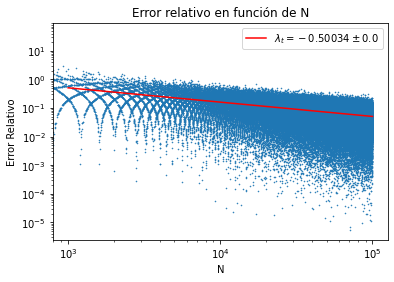

In [16]:
DdataA = func(Ndata,popt[0],popt[1])

plt.scatter(Ndata, Ddata, s = 0.3)
plt.plot(Ndata[corte:], DdataA[corte:],"r-",  
         label=f"$\lambda_t ={round(popt[0],5)} \pm {round(pcov[0][0],5)} $")
plt.xlabel("N")
plt.ylabel(r"Error Relativo")
plt.title(r"Error relativo en función de N")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.savefig(r"Error relativo en función de N para N \in [10^3,10^4]")



In [17]:
Re = 100
Rdata = np.zeros((Re,N),dtype= np.float32)
Rdata.shape

(100, 100000)

In [ ]:
t = np.arange(Re,dtype = np.float32)
for i in range(Re):
    print(i+1)
    t0 = time.time()
    Rdata[i:] = diff(N)
    t1 = time.time()
    t[i] =t1-t0
Rdata

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [ ]:
tp = np.mean(t)#np.float16(np.mean(t))
td = np.std(t)
print(f"Media de tiempo de funcipin diff(N): {tp:.1f}s \n "+
      f"con desviación Estandar: {td:.1f}s")

In [ ]:
Tdata = np.mean(Rdata,0)
Tdata

In [ ]:
popt, pcov = curve_fit(func, Ndata, Tdata)
popt

In [ ]:
DdataA = func(Ndata,popt[0],popt[1])

plt.scatter(Ndata, Ddata, s = 0.3)
plt.plot(Ndata[corte:], DdataA[corte:],"r-",  
         label=f"$\lambda_t ={round(popt[0],5)} \pm {round(pcov[0][0],5)} $")
plt.xlabel("N")
plt.ylabel(r"Error Relativo")
plt.title(r"Error relativo en función de N")
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.savefig(r"Error relativo en función de N para N \in [10^3,10^4]")



# A first simulation: the random walk
The so-called [MonteCarlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method) are computational methods that use random numbers to perform computations or simulations. Applications are extense, from traffic simulations, to atomic systems, to pedestrian crowds, to probabilistic computations, to neutron scattering in nuclear shielding, to materials design, and so on. 

Up to now, we have used random numbers to perform some computations. Now let's simulate a very simple process ,as an introduction to the field of MonteCarlo: the [random walk](https://en.wikipedia.org/wiki/Random_walk), which is an example of [random process](https://en.wikipedia.org/wiki/Stochastic_process). 

We will define a grid, and our walker will chose the next position at random. We are interested in computing the mean squared distance as function of time, which is related with a diffusion process.

NotImplementedError: ignored

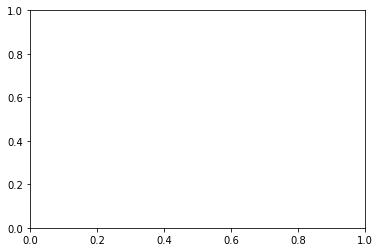

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
def random_walk(seed, nsteps, ax):
    rng = np.random.default_rng(seed=seed)
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    # YOUR CODE HERE
    raise NotImplementedError()
    ax.plot(x, y)
    
NSTEPS = 10000
fig, ax = plt.subplots()
random_walk(10, NSTEPS, ax)
random_walk(2, NSTEPS, ax)
random_walk(7, NSTEPS, ax)

<mark>Exercise</mark>
- [ ] Compute the mean squared distance as a function of time
- [ ] Simulate a 3D random walk